# Exploratory Data Analysis
### Spotify 2023 Dataset


In [564]:
#Import panda library
import pandas as pd

#Import matplotlib's plotting framework library
import matplotlib.pyplot as plt

#Import seaborn's plotting framework library
import seaborn as sns

## Overview of Dataset


In [566]:
# Read csv file
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#### How many rows and columns does the dataset contain?
- There are 953 rows and 24 columns in the dataset.
#### What are the data types of each column? Are there any missing values?
- The dataset includes a combination of integers and strings. Examples of string data types are track name and artist name, while integer data types include artist count, released year, and more. There are some missing values  and key.

## Basic Descriptive Statistics

In [569]:
# Convert the streams column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate mean, median, mode, and standard deviation of the streams column
mean = df['streams'].mean()
median = df['streams'].median()
std = df['streams'].std()

# Print the results of Mean, Median, Mode, and Standard Deviation
print('Mean of streams:', mean) 
print('Median of streams:', median)
print('Standard deviation of streams:', std)


Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard deviation of streams: 566856949.0388832


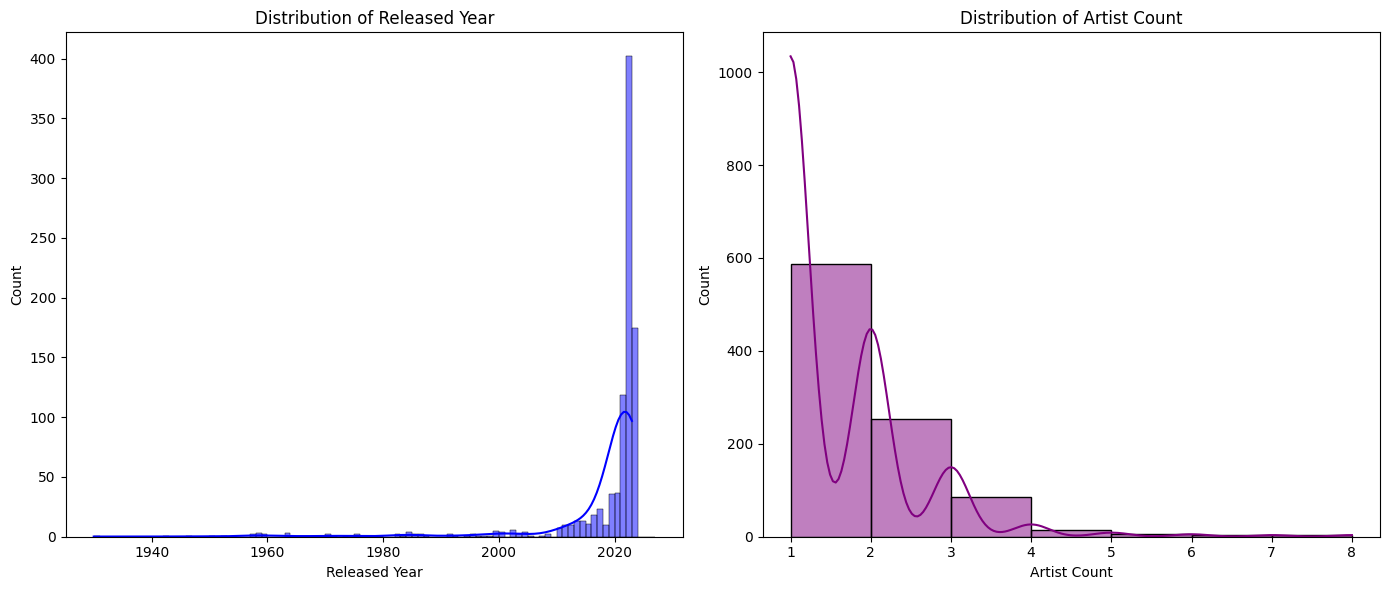

In [570]:
plt.figure(figsize=(14, 6))

# Plot released_year distribution
plt.subplot(1, 2, 1)
sns.histplot(df['released_year'], bins=range(df['released_year'].min(), df['released_year'].max() + 5), kde=True, color='blue')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.title('Distribution of Released Year')

# Plot artist_count distribution
plt.subplot(1, 2, 2)
sns.histplot(df['artist_count'], bins=range(df['artist_count'].min(), df['artist_count'].max() + 1), kde=True, color='purple')
plt.xlabel('Artist Count')
plt.ylabel('Count')
plt.title('Distribution of Artist Count')

plt.tight_layout()
plt.show()


#### What are the mean, median, and standard deviation of the streams column?
- The mean number of streams is 514,137,424, with a median of 290,530,915 streams and a standard deviation of 566,856,949 streams.
#### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?
- The distribution of release years shows an increasing trend over time. From the early 1930s to the 1990s, there were fewer releases, likely due to the limitations of technology at the time. By 2023, releases have reached a peak, with over 400 tracks released.
- The distribution of artist counts shows a declining trend, with the majority of tracks featuring only one artist—over 1,000 tracks fall into this category. The number of tracks decreases as the artist count increases.


##  Top Performers

In [573]:
# Sort values of streams and show important columns such as track name, artist, year, and number of streams
top_5_streamed_tracks = df[['track_name', 'artist(s)_name', 'released_year', 'streams']].sort_values(by='streams', ascending=False).head(5) 

# Organize display of value
pd.options.display.float_format = '{:,.0f}'.format
top_5_streamed_tracks

,track_name,artist(s)_name,released_year,streams
55,Blinding Lights,The Weeknd,2019,"3,703,895,074"
179,Shape of You,Ed Sheeran,2017,"3,562,543,890"
86,Someone You Loved,Lewis Capaldi,2018,"2,887,241,814"
620,Dance Monkey,Tones and I,2019,"2,864,791,672"
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2018,"2,808,096,550"


In [574]:
# Sort frequent artist based on the number of tracks and show important columns such as artist name and count
top_artists = df['artist(s)_name'].value_counts().head(5)
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['artist(s)_name', 'count']
display(top_artists_df)

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


#### Which track has the highest number of streams? Display the top 5 most streamed tracks.
- The track with the highest number of streams is "Blinding Lights" by The Weeknd, with 3,703,895,074 streams. Following it are "Shape of You" by Ed Sheeran, "Someone You Loved" by Lewis Capaldi, "Dance Monkey" by Tones and I, and "Sunflower" by Post Malone and Swae Lee.

#### Who are the top 5 most frequent artists based on the number of tracks in the dataset
- The top five most frequent artists are led by Taylor Swift, with 34 tracks, followed by The Weeknd, Bad Bunny, SZA, and Harry Styles..


##   Temporal Trends

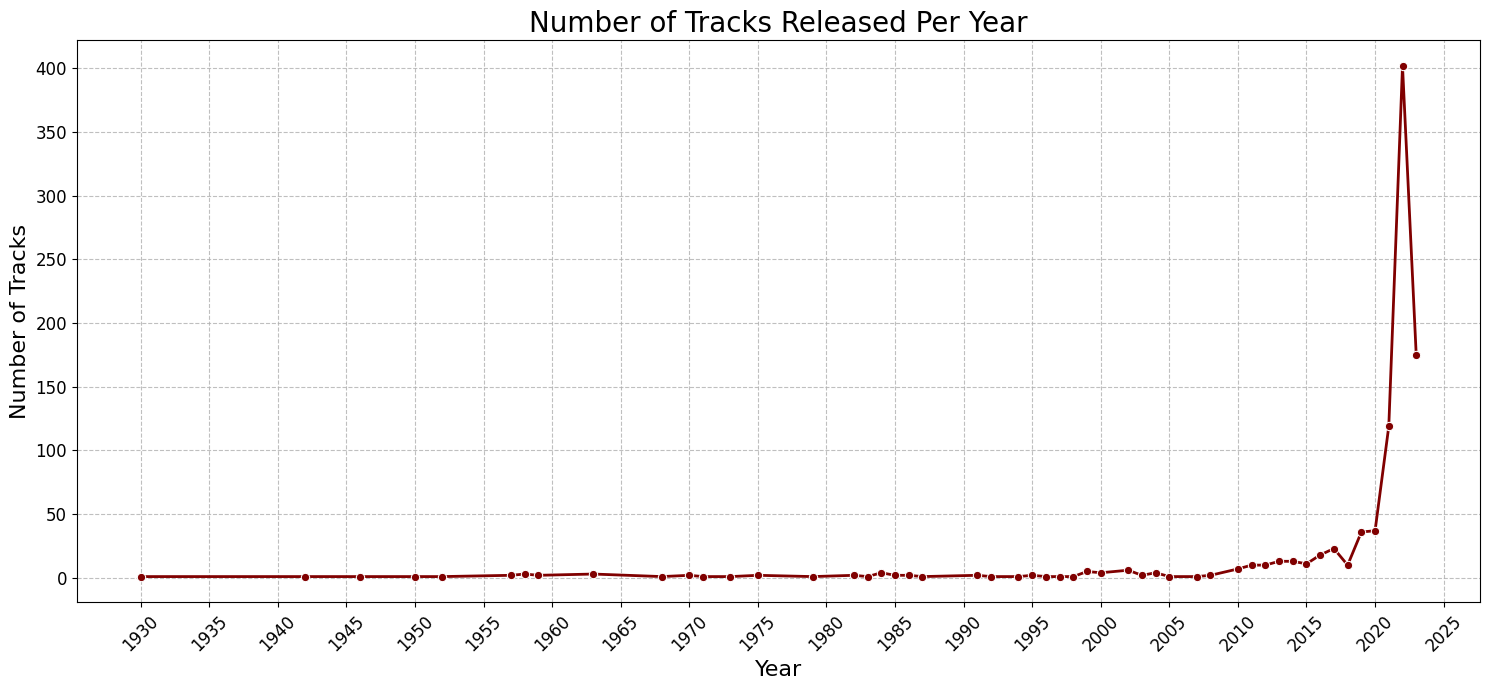

In [577]:
# Count number of tracks released per year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Determine the range for the x-axis ticks (5-year increments)
start_year = tracks_per_year.index.min()
end_year = tracks_per_year.index.max()
years = list(range(start_year, end_year+5, 5))

# Number of Tracks Released Per Year with Point Labels and 5-Year Increments
plt.figure(figsize=(15, 7))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o', linewidth=2, color='maroon')
plt.title('Number of Tracks Released Per Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Tracks', fontsize=16)
plt.xticks(ticks=years, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout() 
plt.show()


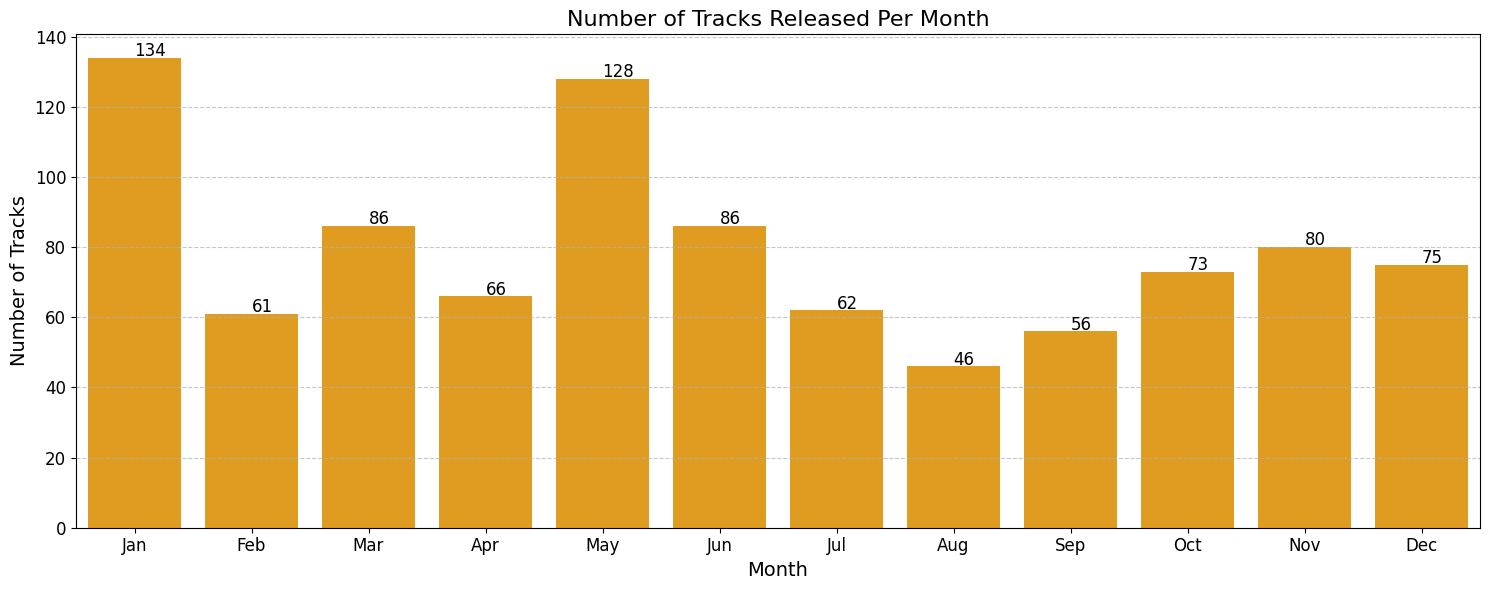

In [578]:
# Count number of tracks released per month
tracks_per_month = df['released_month'].value_counts().sort_index()

# Plot number of tracks released per month with labels
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, color='orange')

# Adding labels to each bar
for index, value in enumerate(tracks_per_month.values):
    barplot.text(index, value + 0.5, f'{value}', color='black', fontsize=12)

plt.title('Number of Tracks Released Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


#### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
- Over time, the number of track releases has steadily increased, reaching a peak in 2022 with over 400 tracks released.
#### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?
- January and May have the highest number of track releases, likely due to the start of the year and the beginning of summer, when many people, especially students, are more inclined to listen to music.

##  Genre and Music Characteristics

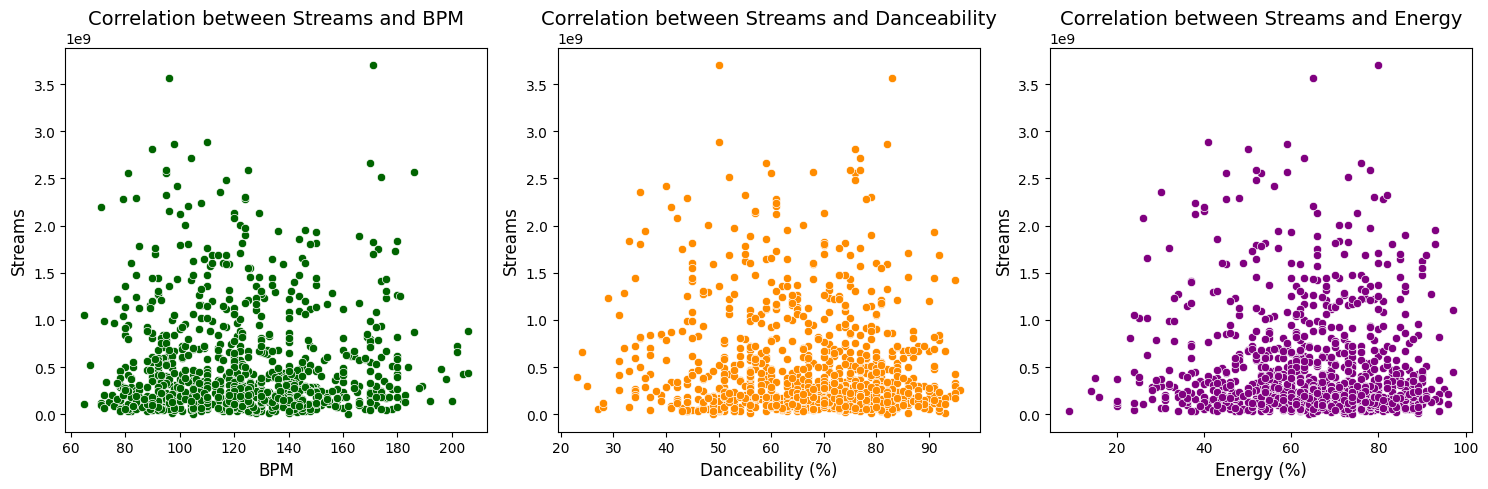

In [581]:
plt.figure(figsize=(15, 5))

# Streams and BPM
plt.subplot(1, 3, 1)
sns.scatterplot(x='bpm', y='streams', data=df, color='darkgreen')
plt.title('Correlation between Streams and BPM', fontsize=14)
plt.xlabel('BPM', fontsize=12)
plt.ylabel('Streams', fontsize=12)

# Streams and Danceability
plt.subplot(1, 3, 2)
sns.scatterplot(x='danceability_%', y='streams', data=df, color='darkorange')
plt.title('Correlation between Streams and Danceability', fontsize=14)
plt.xlabel('Danceability (%)', fontsize=12)
plt.ylabel('Streams', fontsize=12)

# Streams and Energy
plt.subplot(1, 3, 3)
sns.scatterplot(x='energy_%', y='streams', data=df, color='purple')
plt.title('Correlation between Streams and Energy', fontsize=14)
plt.xlabel('Energy (%)', fontsize=12)
plt.ylabel('Streams', fontsize=12)

plt.tight_layout()
plt.show()


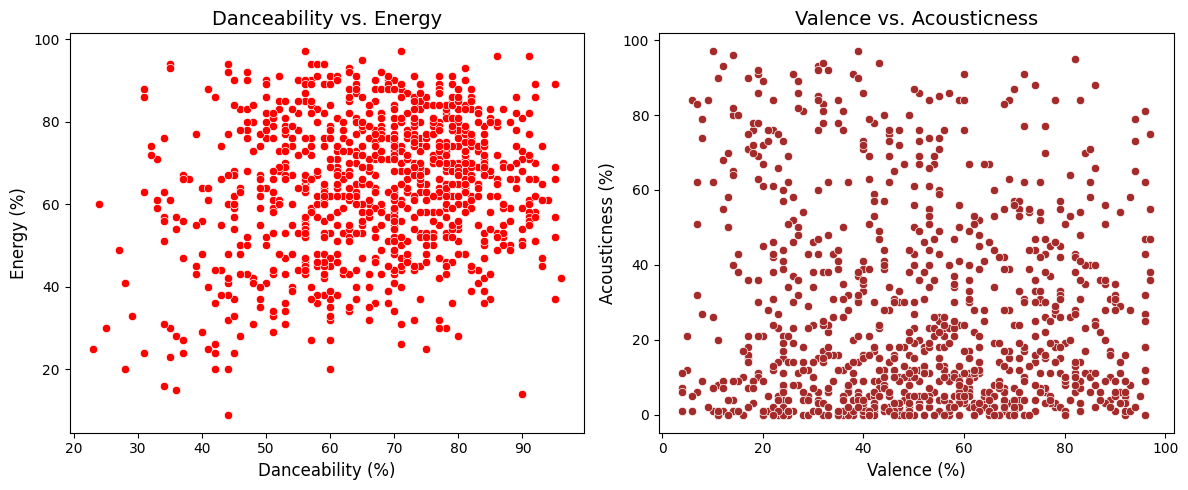

In [582]:
# Scatter plot: Danceability vs. Energy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='danceability_%', y='energy_%', data=df, color='red')
plt.title('Danceability vs. Energy', fontsize=14)
plt.xlabel('Danceability (%)', fontsize=12)
plt.ylabel('Energy (%)', fontsize=12)

# Scatter plot: Valence vs. Acousticness
plt.subplot(1, 2, 2)
sns.scatterplot(x='valence_%', y='acousticness_%', data=df, color='brown')
plt.title('Valence vs. Acousticness', fontsize=14)
plt.xlabel('Valence (%)', fontsize=12)
plt.ylabel('Acousticness (%)', fontsize=12)

plt.tight_layout()
plt.show()


#### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
- There is no clear correlation between streams and musical attributes like BPM, danceability, and energy. Tracks with a wide range of BPM values, from around 60 to 200, show varied stream counts, suggesting that BPM may not significantly influence a track's popularity. Danceability shows a slightly stronger relation with streams than the other attributes, but still lacks a clear correlation. Similarly, the energy plot reveals that streams are distributed across all energy levels, indicating no strong relationship between energy and streams.
#### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
- There appears to be a positive correlation between danceability and energy, as the scatterplot shows an increasing trend. This suggests that songs with higher danceability tend to have more energy, which aligns with the idea that danceable tracks are often fast-paced and upbeat. Valence and acousticness do not seem to have a clear correlation, as the scatterplot does not show any noticeable pattern between the two. 

 ## Platform Popularity

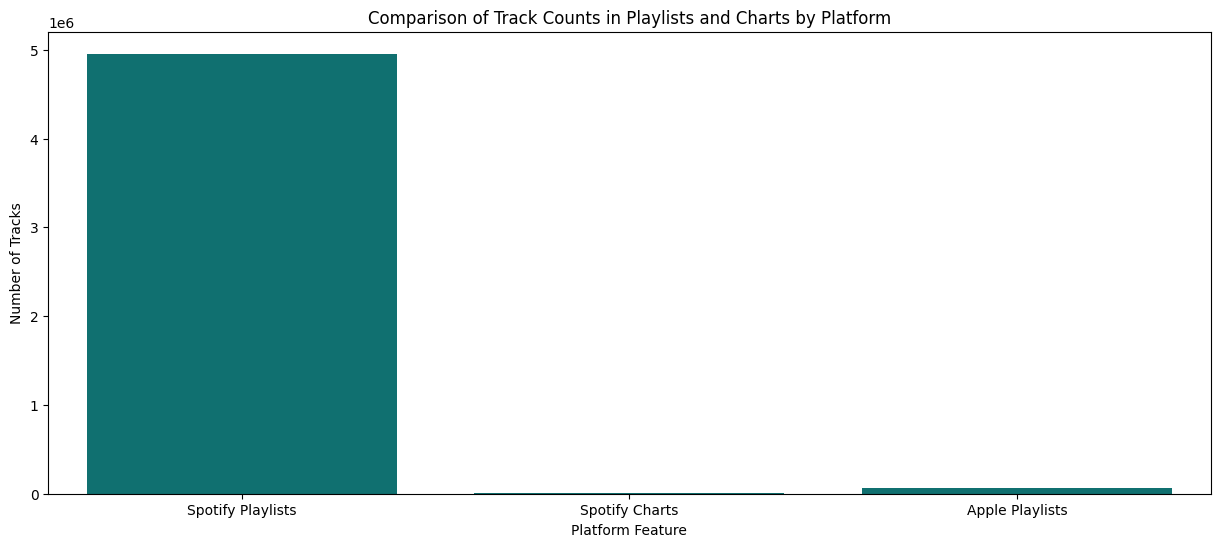

In [585]:
# Count how many tracks are featured in each playlist/chart category
spotify_playlists_count = df['in_spotify_playlists'].sum()
spotify_charts_count = df['in_spotify_charts'].sum()
apple_playlists_count = df['in_apple_playlists'].sum()

# Convert to DataFrame for plotting
counts = {
    'Spotify Playlists': spotify_playlists_count,
    'Spotify Charts': spotify_charts_count,
    'Apple Playlists': apple_playlists_count
}
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Track Count'])

# Plot comparison
plt.figure(figsize=(15, 6))
sns.barplot(x=counts_df.index, y=counts_df['Track Count'], color='teal')
plt.title('Comparison of Track Counts in Playlists and Charts by Platform')
plt.xlabel('Platform Feature')
plt.ylabel('Number of Tracks')
plt.show()


#### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks? 
- The Spotify playlists contain the highest number of tracks compared to both Apple playlists and the Spotify Charts. This is likely due to the higher number of streams on Spotify, which results in Spotify playlists often favoring a larger selection of tracks compared to the other platforms.

## Advanced Analysis

<Figure size 1200x600 with 0 Axes>

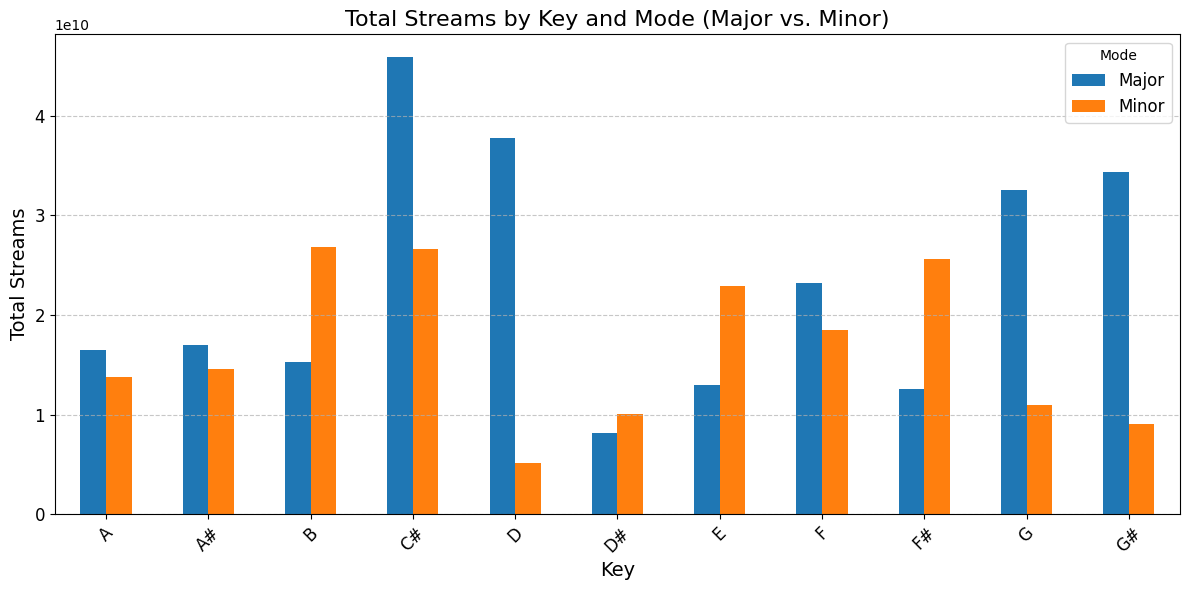

In [588]:
# Create a bar plot for total streams
streams_by_key_mode = df.groupby(['key', 'mode'], observed=False)['streams'].sum().unstack()
plt.figure(figsize=(12, 6))
streams_by_key_mode.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Key', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)
plt.title('Total Streams by Key and Mode (Major vs. Minor)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Mode', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [589]:
# Calculate total appearances in Spotify playlists and charts for each artist
artist_playlists = df.groupby('artist(s)_name', as_index=False)['in_spotify_playlists'].sum().rename(columns={'in_spotify_playlists': 'playlist_count'})
artist_charts = df.groupby('artist(s)_name', as_index=False)['in_spotify_charts'].sum().rename(columns={'in_spotify_charts': 'chart_count'})

# Merge the playlists and charts data on artist name
artist_summary = pd.merge(artist_playlists, artist_charts, on='artist(s)_name', how='outer').fillna(0)

# Convert counts to integers for better readability
artist_summary[['playlist_count', 'chart_count']] = artist_summary[['playlist_count', 'chart_count']].astype(int)

# Sort by playlist and chart counts and display the top 10 artists
top_artists = artist_summary.sort_values(by=['playlist_count', 'chart_count'], ascending=False).head(10)
top_artists


,artist(s)_name,playlist_count,chart_count
572,The Weeknd,144053,180
558,Taylor Swift,132974,542
159,Ed Sheeran,128758,94
223,Harry Styles,110026,185
171,Eminem,87331,152
25,Arctic Monkeys,84016,190
111,Coldplay,75716,72
33,Avicii,68241,42
141,"Dr. Dre, Snoop Dogg",65728,0
7,Adele,65049,69


#### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
- Songs in major keys tend to dominate mainstream charts and playlists. However, minor key songs can also achieve significant popularity, particularly in genres that emphasize emotional depth and expression.
#### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.
- Yes, there is a relationship, but it is not entirely consistent, as the chart_count does not always correlate with the playlist_count. For example, Taylor Swift ranks second behind The Weeknd in terms of total tracks, yet she has significantly more chart appearances. This indicates that while both playlist and chart counts reflect an artist's popularity, they do not always align in terms of their overall representation.